# 惠聚电商平台用户品类偏好与消费行为深度分析

## 阶段二：探索性数据分析 (EDA)

### 1. 引言与目标

在完成了数据的初步理解和预处理之后，本阶段我们将进行探索性数据分析 (EDA)。

**目标**：
*   通过可视化和统计摘要，深入了解各个用户特征（性别、年龄、职业、城市等）的分布。
*   分析商品品类（`Product_Category`）的受欢迎程度和销售额分布。
*   探索购买金额（`Purchase`）的整体分布特征。
*   初步探究不同用户特征与购买行为之间的潜在关系。

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 绘图美化与中文支持配置 ---
# 尝试使用更美观的Seaborn样式
plt.style.use('seaborn-v0_8-whitegrid') # 或者 'seaborn-v0_8-colorblind', 'ggplot'

# 设置更柔和的调色板
sns.set_palette('pastel') # 'muted', 'viridis', 'tab10' 也是不错的选择

# 配置Matplotlib显示中文（请确保你已安装相应字体）
# 常用的字体包括 'SimHei', 'Microsoft YaHei', 'Arial Unicode MS' (Mac)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 你可以替换成你系统中可用的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 统一设置字体大小 (可选，根据需要调整)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 18 # 坐标轴标题
plt.rcParams['axes.labelsize'] = 14 # 坐标轴标签
plt.rcParams['xtick.labelsize'] = 12 # x轴刻度
plt.rcParams['ytick.labelsize'] = 12 # y轴刻度
plt.rcParams['legend.fontsize'] = 12 # 图例
plt.rcParams['figure.titlesize'] = 20 # 图形总标题 (如果使用 suptitle)
# --- 结束：绘图美化与中文支持配置 ---

# 配置pandas显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 加载数据 (与之前一致)
data_path = '../data/huiju_sales_data_2022_processed.csv'
try:
    df = pd.read_csv(data_path)
    print("数据加载成功！")
    
    df['Occupation'] = df['Occupation'].astype('category')
    df['Marital_Status'] = df['Marital_Status'].astype('category')
    df['Product_Category'] = df['Product_Category'].astype('category')
    df['Gender'] = df['Gender'].astype('category')
    df['Age'] = df['Age'].astype('category')
    df['City_Category'] = df['City_Category'].astype('category')
    df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')
    
    print("数据类型已转换。")
    # df.info() # 你已经确认过这个信息，这里可以暂时注释掉
except FileNotFoundError:
    print(f"错误：数据文件未在指定路径找到: {data_path}")
    df = None

数据加载成功！
数据类型已转换。


### 2. 用户特征分析 (Univariate Analysis)

分析各个用户相关字段的分布情况。

#### 2.1 性别 (Gender)

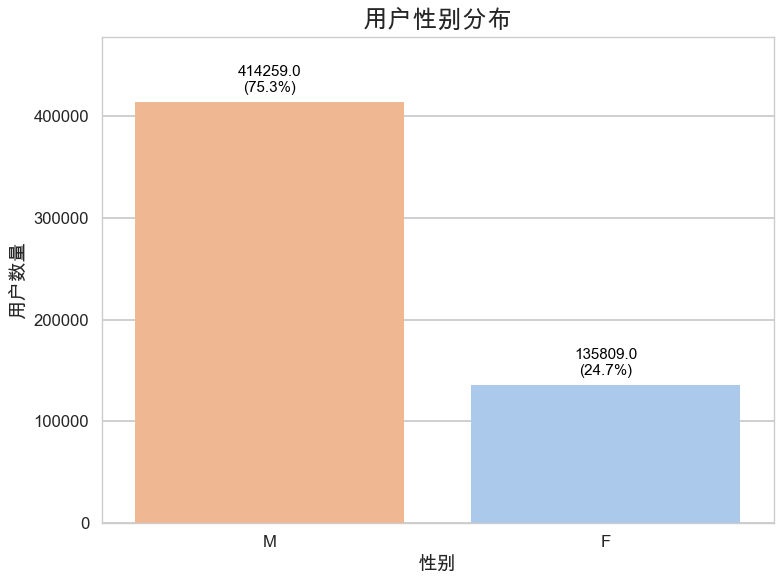

性别分布比例:
Gender
M   75.311
F   24.689
Name: proportion, dtype: float64


In [28]:
if df is not None:
    plt.figure(figsize=(8, 6)) # 可以微调图形大小
    ax = sns.countplot(data=df, x='Gender', hue='Gender', order=df['Gender'].value_counts().index, palette='pastel', legend=False) # 使用一致的调色板
    
    plt.title('用户性别分布') # 字体大小会由rcParams控制
    plt.xlabel('性别')
    plt.ylabel('用户数量')
    
    total = len(df['Gender'])
    for p in ax.patches:
        percentage = f'{100 * p.get_height()/total:.1f}%'
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        # 将标注文本放置在柱子顶端上方一点点
        ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', 
                    fontsize=11, color='black', xytext=(0,5), textcoords='offset points')

    # 调整y轴上限，给标注留出空间
    ax.set_ylim(0, ax.get_ylim()[1] * 1.1) 
    
    plt.tight_layout() # 自动调整子图参数，使之填充整个图像区域
    plt.show()

    print("性别分布比例:")
    print(df['Gender'].value_counts(normalize=True) * 100)

#### 2.2 年龄 (Age)

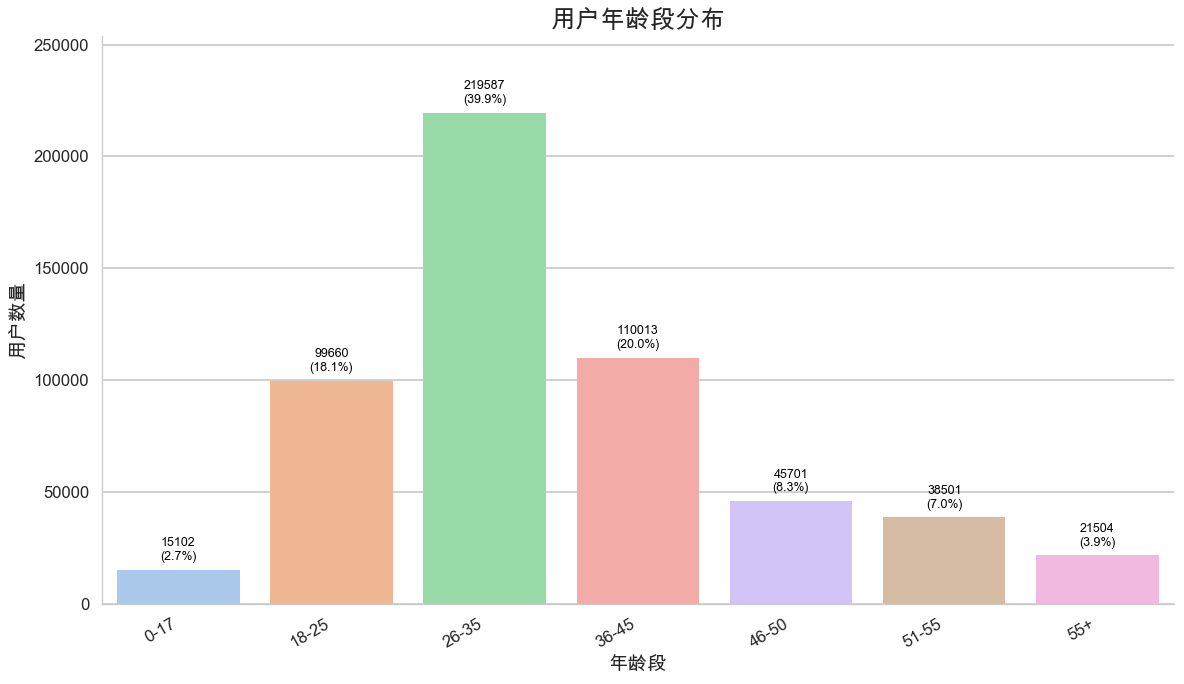

年龄段分布比例:
Age
0-17     2.745
18-25   18.118
26-35   39.920
36-45   20.000
46-50    8.308
51-55    6.999
55+      3.909
Name: proportion, dtype: float64


In [18]:
if df is not None:
    age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
    
    plt.figure(figsize=(12, 7)) # 调整尺寸以容纳更多标签
    # ax = sns.countplot(data=df, x='Age', order=age_order, palette='pastel')
    ax = sns.countplot(data=df, x='Age', hue='Age', order=age_order, palette='pastel', legend=False)
    
    plt.title('用户年龄段分布')
    plt.xlabel('年龄段')
    plt.ylabel('用户数量')
    plt.xticks(rotation=30, ha='right') # 轻微旋转，避免重叠
    
    total = len(df['Age'])
    for p in ax.patches:
        percentage = f'{100 * p.get_height()/total:.1f}%'
        count = int(p.get_height()) # 确保是整数显示
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', 
                    fontsize=9, color='black', xytext=(0,5), textcoords='offset points')

    ax.set_ylim(0, ax.get_ylim()[1] * 1.1)
    sns.despine() # 移除顶部和右侧的轴线，更简洁
    plt.tight_layout()
    plt.show()

    print("年龄段分布比例:")
    print(df['Age'].value_counts(normalize=True).sort_index() * 100)

#### 2.3 职业 (Occupation)

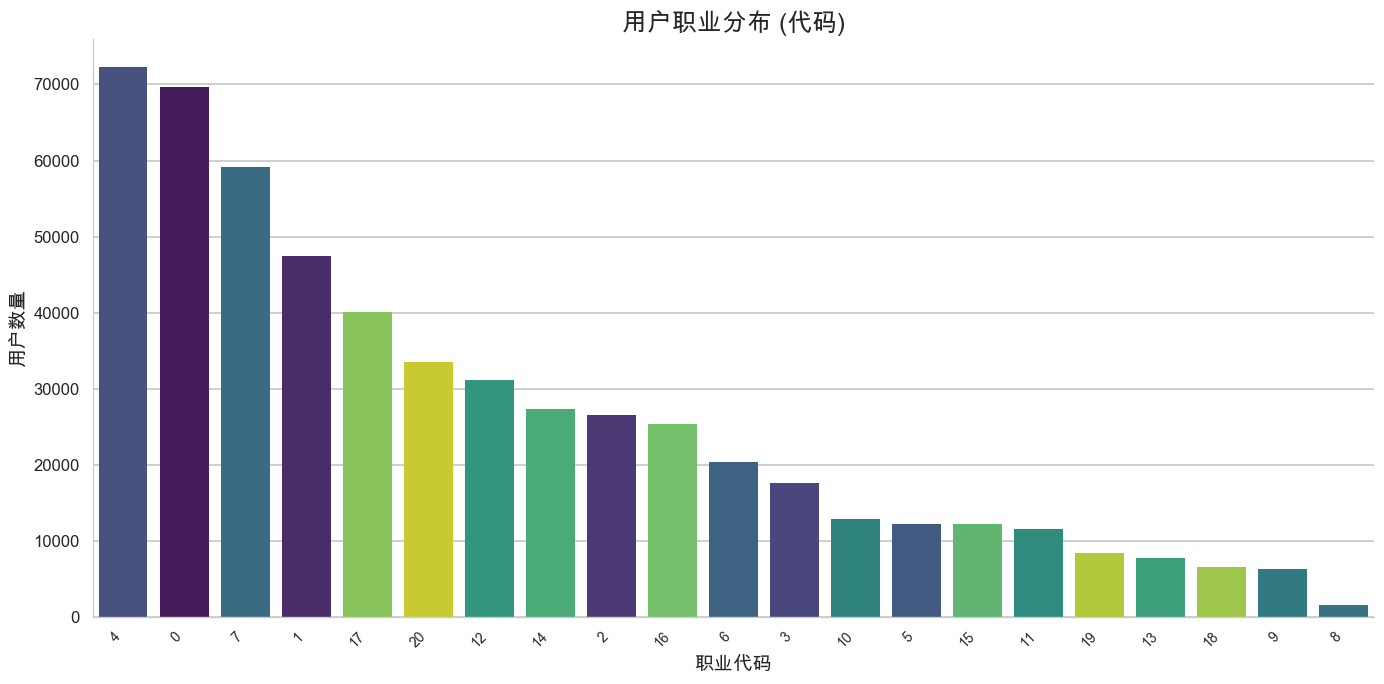

职业代码值计数 (Top 10):
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
Name: count, dtype: int64


In [24]:
if df is not None:
    plt.figure(figsize=(14, 7)) # 加宽图形以显示更多职业代码
    # 按数量降序排列职业代码
    occupation_order = df['Occupation'].value_counts().index 
    # ax = sns.countplot(data=df, x='Occupation', order=occupation_order, palette='viridis') # 可以为这个图换个色盘
    ax = sns.countplot(data=df, x='Occupation', hue='Occupation', order=occupation_order, palette='viridis', legend=False) # 可以为这个图换个色盘

    plt.title('用户职业分布 (代码)')
    plt.xlabel('职业代码')
    plt.ylabel('用户数量')
    plt.xticks(rotation=45, ha='right', fontsize=10) # 调整字体大小和旋转
    
    # 对于类别过多的条形图，通常不直接在每个条上标注数值，除非是Top N
    # 如果需要标注，可以只标注Top N，例如：
    # for i, p in enumerate(ax.patches):
    #     if i < 5: # 只标注前5个
    #         count = int(p.get_height())
    #         x = p.get_x() + p.get_width() / 2
    #         y = p.get_height()
    #         ax.annotate(f'{count}', (x, y), ha='center', va='bottom', 
    #                     fontsize=9, color='black', xytext=(0,3), textcoords='offset points')

    sns.despine()
    plt.tight_layout()
    plt.show()

    print("职业代码值计数 (Top 10):")
    print(df['Occupation'].value_counts().head(10))

#### 2.4 城市类别 (City_Category)

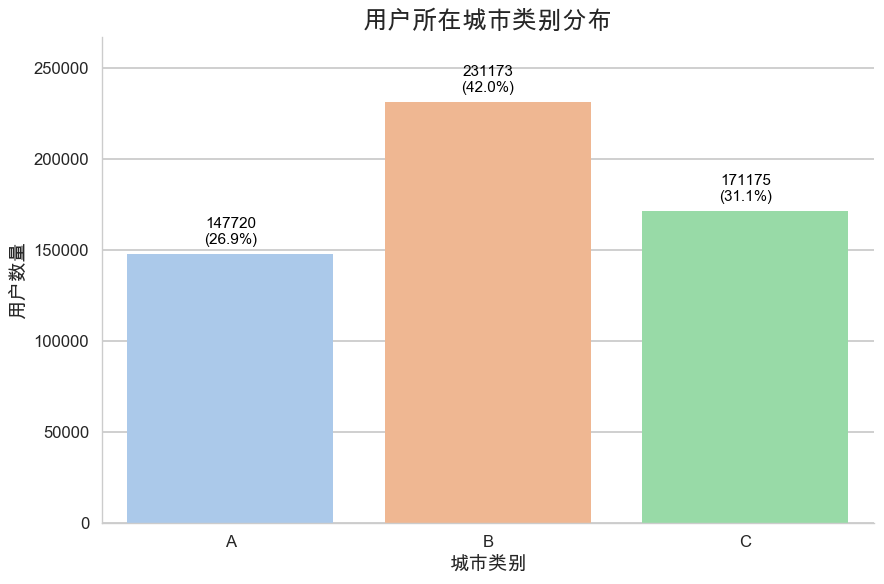

城市类别分布比例:
City_Category
A   26.855
B   42.026
C   31.119
Name: proportion, dtype: float64


In [25]:
if df is not None:
    city_order = sorted(df['City_Category'].unique().astype(str))
    plt.figure(figsize=(9, 6))
    ax = sns.countplot(data=df, x='City_Category',hue='City_Category', order=city_order, palette='pastel', legend=False)
    
    plt.title('用户所在城市类别分布')
    plt.xlabel('城市类别')
    plt.ylabel('用户数量')
    
    total = len(df['City_Category'])
    for p in ax.patches:
        percentage = f'{100 * p.get_height()/total:.1f}%'
        count = int(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', 
                    fontsize=11, color='black', xytext=(0,5), textcoords='offset points')

    ax.set_ylim(0, ax.get_ylim()[1] * 1.1)
    sns.despine()
    plt.tight_layout()
    plt.show()

    print("城市类别分布比例:")
    print(df['City_Category'].value_counts(normalize=True).sort_index() * 100)

#### 2.5 在当前城市居住年限 (Stay_In_Current_City_Years)

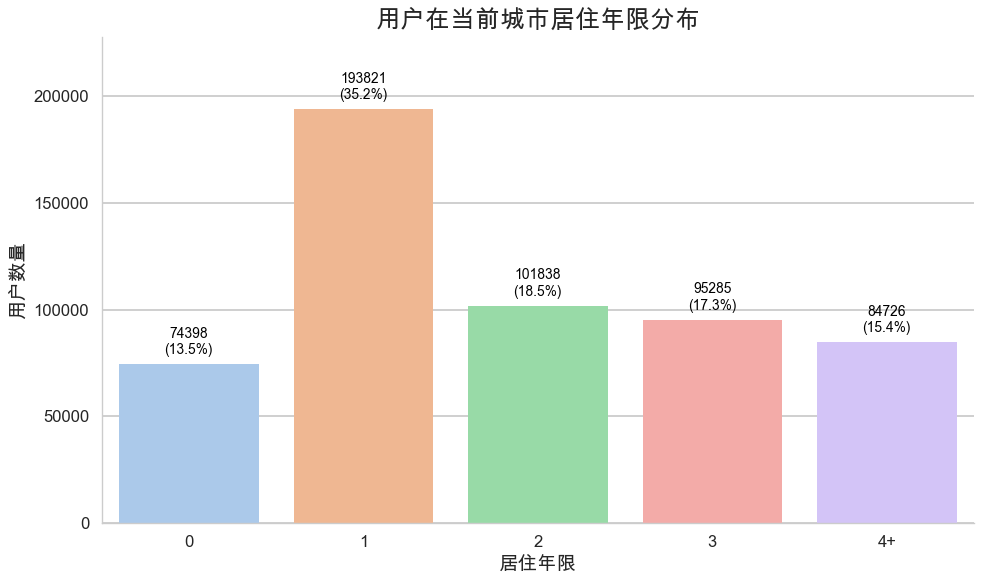

在当前城市居住年限分布比例:
Stay_In_Current_City_Years
0    13.525
1    35.236
2    18.514
3    17.322
4+   15.403
Name: proportion, dtype: float64


In [26]:
if df is not None:
    stay_order = ['0', '1', '2', '3', '4+']
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='Stay_In_Current_City_Years', hue='Stay_In_Current_City_Years', order=stay_order, palette='pastel', legend=False)
    
    plt.title('用户在当前城市居住年限分布')
    plt.xlabel('居住年限')
    plt.ylabel('用户数量')
    
    total = len(df['Stay_In_Current_City_Years'])
    for p in ax.patches:
        percentage = f'{100 * p.get_height()/total:.1f}%'
        count = int(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', 
                    fontsize=10, color='black', xytext=(0,5), textcoords='offset points') # 略微调小标注字体

    ax.set_ylim(0, ax.get_ylim()[1] * 1.12) # 稍微多留一点顶部空间
    sns.despine()
    plt.tight_layout()
    plt.show()

    print("在当前城市居住年限分布比例:")
    print(df['Stay_In_Current_City_Years'].value_counts(normalize=True).sort_index() * 100)

#### 2.6 婚姻状况 (Marital_Status)

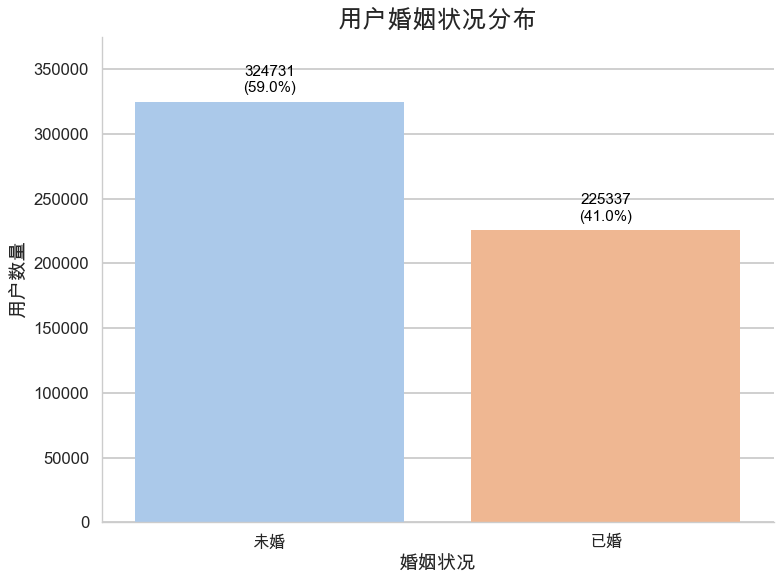

婚姻状况 (0:未婚, 1:已婚) 分布比例:
Marital_Status
未婚   59.035
已婚   40.965
Name: proportion, dtype: float64


In [27]:
if df is not None:
    plt.figure(figsize=(8, 6))
    marital_map = {0: '未婚', 1: '已婚'}
    # 应用映射以便在绘图时使用标签，但排序仍基于原始值或映射后的标签
    order_labels = [marital_map[val] for val in sorted(df['Marital_Status'].unique().tolist())]

    ax = sns.countplot(data=df, x=df['Marital_Status'].map(marital_map), hue=df['Marital_Status'].map(marital_map), order=order_labels, palette='pastel', legend=False)
    
    plt.title('用户婚姻状况分布')
    plt.xlabel('婚姻状况')
    plt.ylabel('用户数量')
    
    total = len(df['Marital_Status'])
    for p in ax.patches:
        percentage = f'{100 * p.get_height()/total:.1f}%'
        count = int(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', 
                    fontsize=11, color='black', xytext=(0,5), textcoords='offset points')

    ax.set_ylim(0, ax.get_ylim()[1] * 1.1)
    sns.despine()
    plt.tight_layout()
    plt.show()

    print("婚姻状况 (0:未婚, 1:已婚) 分布比例:")
    print(df['Marital_Status'].value_counts(normalize=True).rename(index=marital_map) * 100)

### 3. 产品品类与购买金额分析

接下来，我们分析商品品类 (`Product_Category`) 的分布和购买金额 (`Purchase`) 的特征。

#### 3.1 商品品类 (`Product_Category`) 分布

分析不同商品品类的受欢迎程度（基于购买次数）。

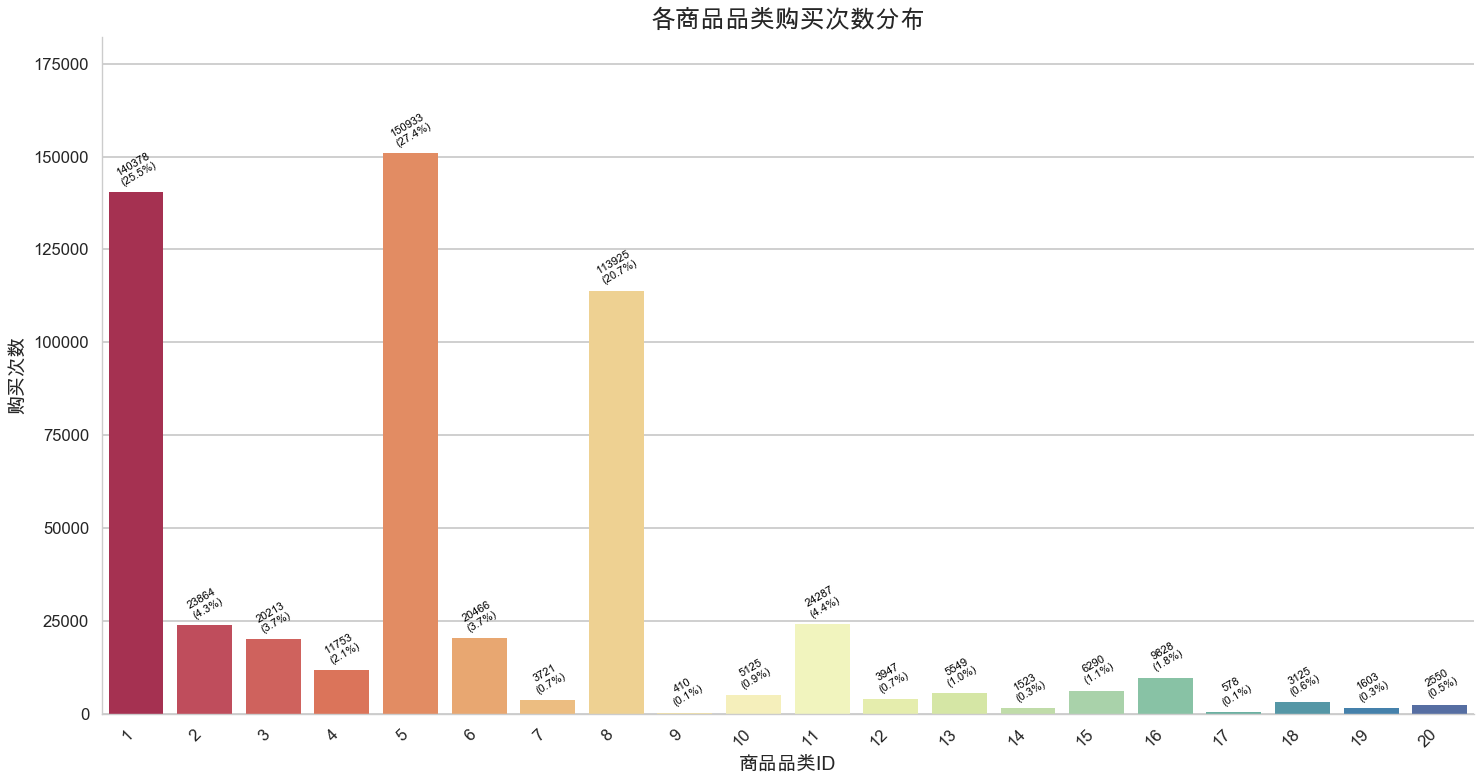

商品品类购买次数 Top 10:
Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
Name: count, dtype: int64

商品品类购买次数分布 (按品类ID排序):
Product_Category
1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: count, dtype: int64


In [33]:
if df is not None:
    plt.figure(figsize=(15, 8)) # 图形可以宽一些，因为品类较多
    
    # 按品类ID排序，方便观察
    category_order = sorted(df['Product_Category'].unique().astype(int))
    
    ax = sns.countplot(data=df, x='Product_Category', hue='Product_Category', order=category_order, palette='Spectral', legend=False) # 换一个多色调色板
    
    plt.title('各商品品类购买次数分布')
    plt.xlabel('商品品类ID')
    plt.ylabel('购买次数')
    plt.xticks(rotation=45, ha='right')
    
    # 为数量较多的品类添加标注
    for p in ax.patches:
        count = int(p.get_height())
        percentage = f'{100 * count / len(df):.1f}%' # 占总交易次数的百分比
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', 
                    fontsize=8, color='black', xytext=(0,3), textcoords='offset points',
                    rotation=30) # 标注也轻微旋转，如果空间不足

    ax.set_ylim(0, ax.get_ylim()[1] * 1.15) # 给标注更多空间
    sns.despine()
    plt.tight_layout()
    plt.show()

    print("商品品类购买次数 Top 10:")
    print(df['Product_Category'].value_counts().head(10))
    print("\n商品品类购买次数分布 (按品类ID排序):")
    print(df['Product_Category'].value_counts().sort_index())

#### 3.2 购买金额 (`Purchase`) 分布

分析单次购买金额的分布情况。

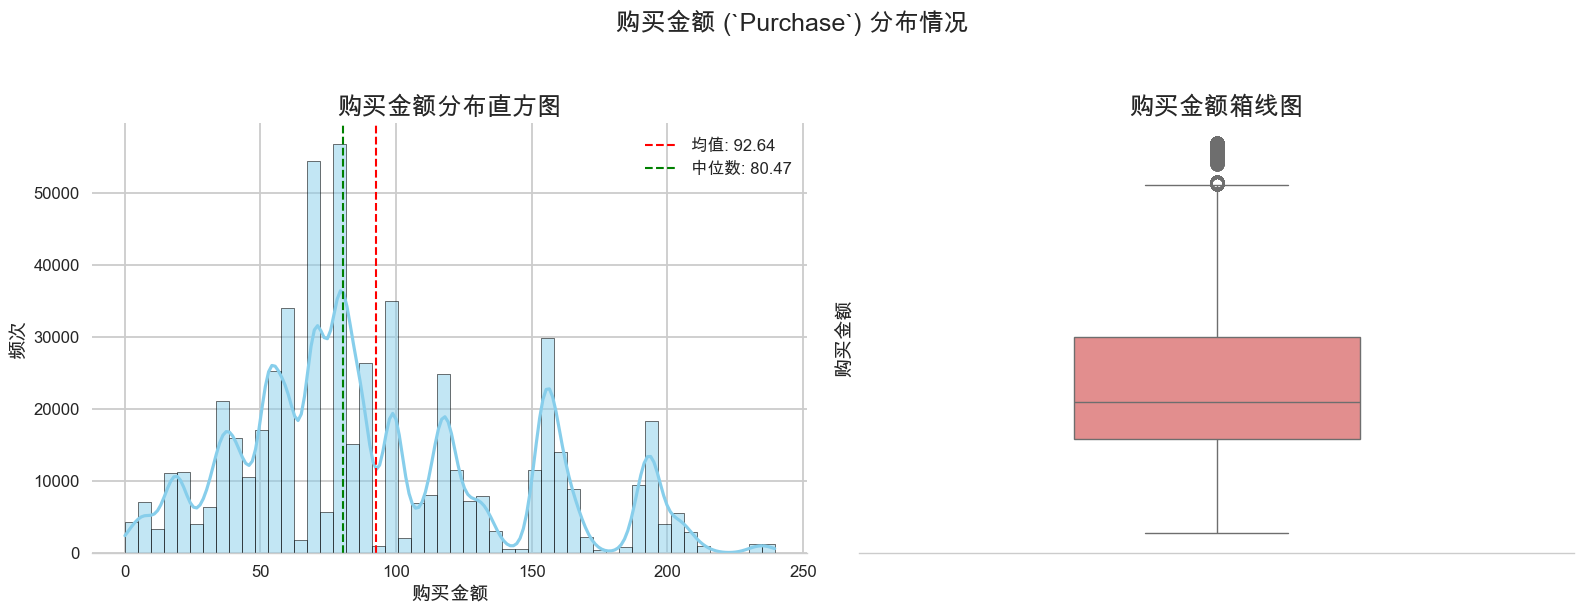

购买金额描述性统计:
count   550068.000
mean        92.640
std         50.231
min          0.120
25%         58.230
50%         80.470
75%        120.540
max        239.610
Name: Purchase, dtype: float64


In [34]:
if df is not None:
    plt.figure(figsize=(16, 6))

    # 图1: 直方图
    plt.subplot(1, 2, 1) # 1行2列的第1个图
    sns.histplot(df['Purchase'], kde=True, bins=50, color='skyblue') # bins可以调整以观察不同粒度
    plt.title('购买金额分布直方图')
    plt.xlabel('购买金额')
    plt.ylabel('频次')
    mean_purchase = df['Purchase'].mean()
    median_purchase = df['Purchase'].median()
    plt.axvline(mean_purchase, color='red', linestyle='dashed', linewidth=1.5, label=f'均值: {mean_purchase:.2f}')
    plt.axvline(median_purchase, color='green', linestyle='dashed', linewidth=1.5, label=f'中位数: {median_purchase:.2f}')
    plt.legend()
    sns.despine()

    # 图2: 箱线图
    plt.subplot(1, 2, 2) # 1行2列的第2个图
    sns.boxplot(y=df['Purchase'], color='lightcoral', width=0.4)
    plt.title('购买金额箱线图')
    plt.ylabel('购买金额')
    sns.despine(left=True) # 箱线图通常不需要左侧的y轴刻度线本身
    plt.yticks([]) # 隐藏y轴刻度标签，因为数值大小已经在箱线图本身体现

    plt.suptitle('购买金额 (`Purchase`) 分布情况', fontsize=18, y=1.02) # 总标题
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # 调整布局，为总标题留空间
    plt.show()

    print("购买金额描述性统计:")
    print(df['Purchase'].describe())

### 4. 双变量分析：用户特征与购买行为/品类偏好

在了解了各个特征的独立分布后，我们现在来探索它们之间的关系。

#### 4.1 用户特征与购买金额 (`Purchase`)

我们将分析不同用户群体（如性别、年龄段、城市类别、婚姻状况）在购买金额上是否存在差异。

##### 4.1.1 性别 vs. 购买金额

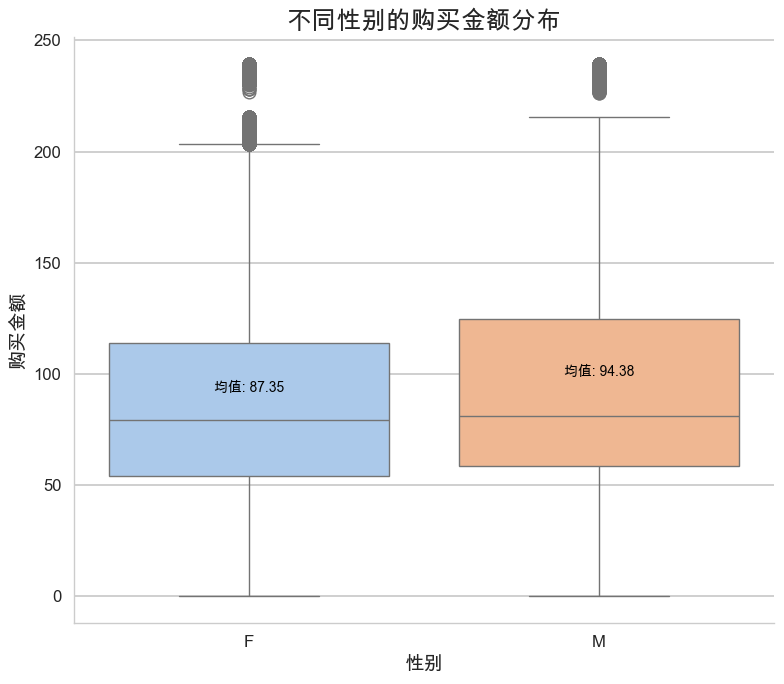

按性别分组的购买金额描述性统计:
            count   mean    std   min    25%    50%     75%     max
Gender                                                             
F      135809.000 87.346 47.672 0.120 54.330 79.140 114.000 239.590
M      414259.000 94.375 50.922 0.120 58.630 80.980 124.540 239.610


In [38]:
if df is not None:
    plt.figure(figsize=(8, 7))
    sns.boxplot(data=df, x='Gender', y='Purchase', hue='Gender', palette='pastel')
    plt.title('不同性别的购买金额分布')
    plt.xlabel('性别')
    plt.ylabel('购买金额')
    
    # 计算并标注均值 (可选，因为箱线图主要显示中位数和分布)
    # mean_purchase_gender = df.groupby('Gender')['Purchase'].mean()
    mean_purchase_gender = df.groupby('Gender', observed=False)['Purchase'].mean()
    for i, gender in enumerate(df['Gender'].unique()):
        if gender in mean_purchase_gender.index: # 确保gender存在于分组结果中
            plt.text(i, mean_purchase_gender[gender] * 1.05, # 位置微调
                     f"均值: {mean_purchase_gender[gender]:.2f}", 
                     ha='center', color='black', fontsize=10, weight='bold')

    sns.despine()
    plt.tight_layout()
    plt.show()

    print("按性别分组的购买金额描述性统计:")
    # print(df.groupby('Gender')['Purchase'].describe())
    print(df.groupby('Gender', observed=False)['Purchase'].describe())

##### 4.1.2 年龄段 vs. 购买金额

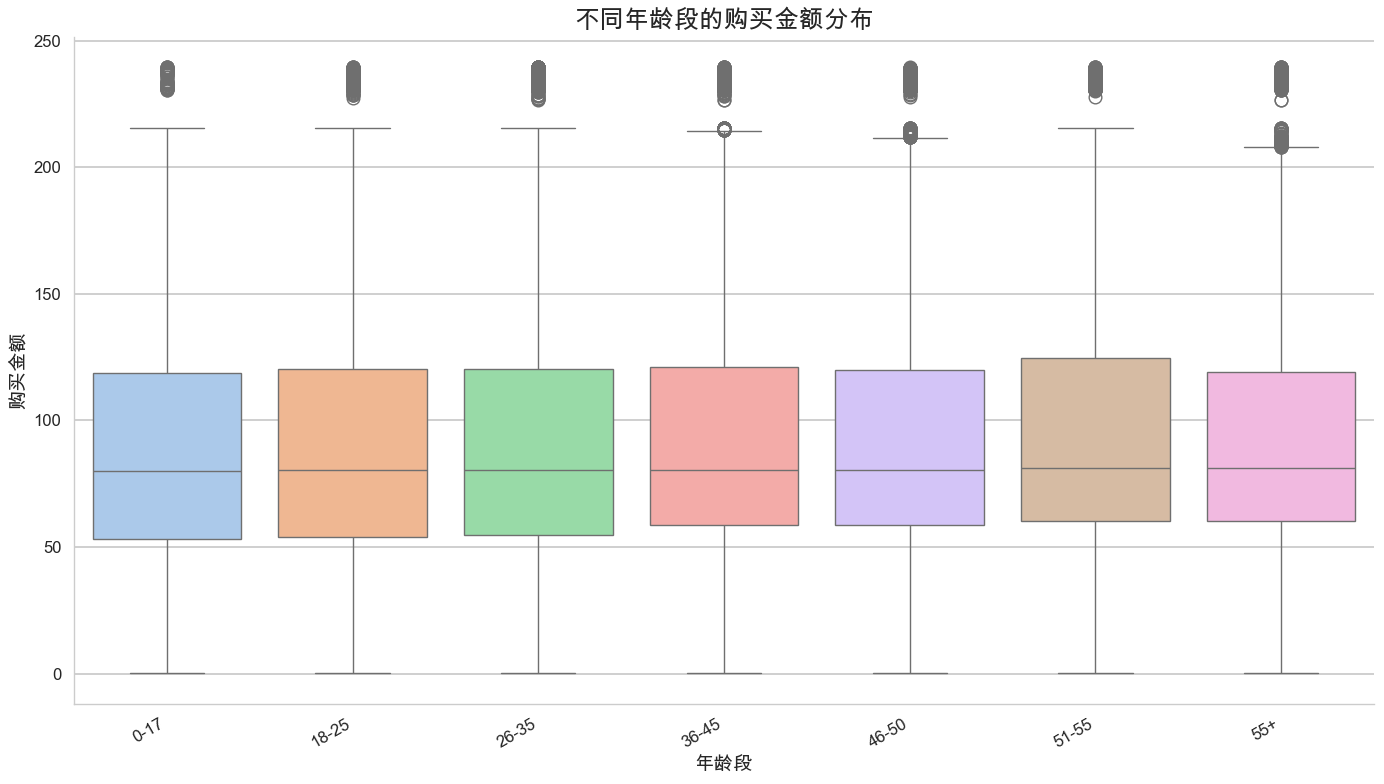

按年龄段分组的购买金额描述性统计:
           count   mean    std   min    25%    50%     75%     max
Age                                                               
0-17   15102.000 89.335 51.111 0.120 53.280 79.860 118.740 239.550
18-25  99660.000 91.697 50.343 0.120 54.150 80.270 120.280 239.580
26-35 219587.000 92.527 50.105 0.120 54.750 80.300 120.470 239.610
36-45 110013.000 93.314 50.229 0.120 58.760 80.610 121.070 239.600
46-50  45701.000 92.086 49.672 0.120 58.880 80.360 119.970 239.600
51-55  38501.000 95.348 50.874 0.120 60.170 81.300 124.620 239.600
55+    21504.000 93.363 50.115 0.120 60.180 81.055 119.320 239.600


In [40]:
if df is not None:
    age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df, x='Age', y='Purchase', hue='Age', order=age_order, palette='pastel')
    plt.title('不同年龄段的购买金额分布')
    plt.xlabel('年龄段')
    plt.ylabel('购买金额')
    plt.xticks(rotation=30, ha='right')
    sns.despine()
    plt.tight_layout()
    plt.show()

    print("按年龄段分组的购买金额描述性统计:")
    print(df.groupby('Age', observed=False)['Purchase'].describe())

##### 4.1.3 城市类别 vs. 购买金额

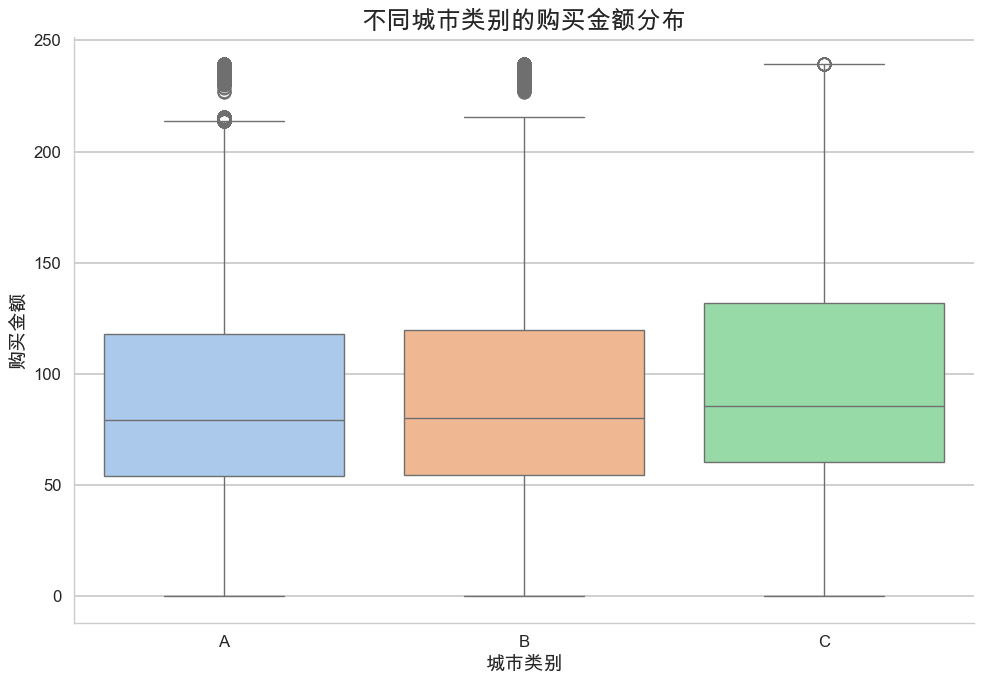

按城市类别分组的购买金额描述性统计:
                   count   mean    std   min    25%    50%     75%     max
City_Category                                                             
A             147720.000 89.119 48.921 0.120 54.030 79.310 117.860 239.610
B             231173.000 91.513 49.555 0.120 54.600 80.050 119.860 239.600
C             171175.000 97.199 51.895 0.120 60.315 85.850 131.970 239.610


In [41]:
if df is not None:
    city_order = sorted(df['City_Category'].unique().astype(str))
    plt.figure(figsize=(10, 7))
    sns.boxplot(data=df, x='City_Category', y='Purchase', hue='City_Category', order=city_order, palette='pastel')
    plt.title('不同城市类别的购买金额分布')
    plt.xlabel('城市类别')
    plt.ylabel('购买金额')
    sns.despine()
    plt.tight_layout()
    plt.show()

    print("按城市类别分组的购买金额描述性统计:")
    print(df.groupby('City_Category', observed=False)['Purchase'].describe())

##### 4.1.4 婚姻状况 vs. 购买金额

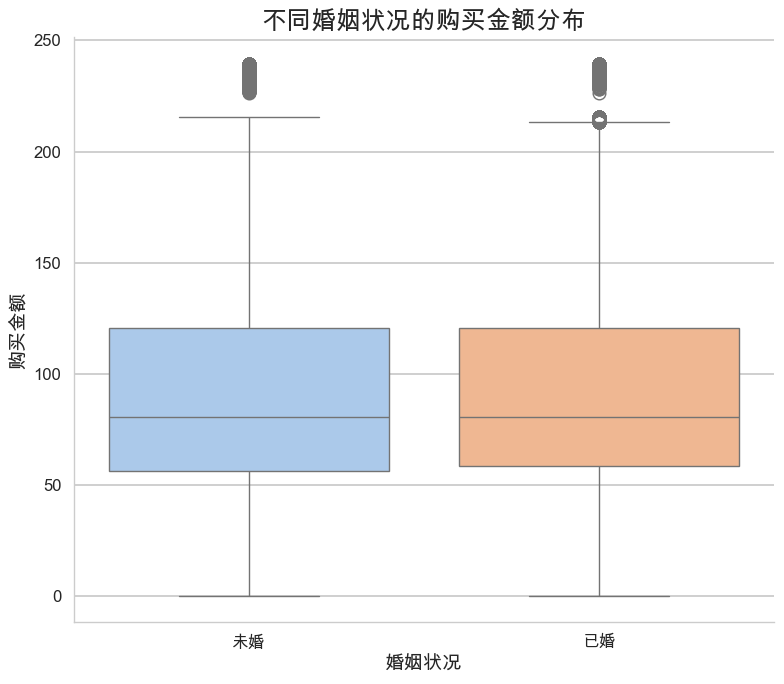

按婚姻状况分组的购买金额描述性统计:
                          count   mean    std   min    25%    50%     75%  \
Marital_Status_Label                                                        
未婚                   324731.000 92.659 50.273 0.120 56.050 80.440 120.610   
已婚                   225337.000 92.612 50.169 0.120 58.430 80.510 120.420   

                         max  
Marital_Status_Label          
未婚                   239.610  
已婚                   239.610  


In [39]:
if df is not None:
    marital_map = {0: '未婚', 1: '已婚'}
    order_labels = [marital_map[val] for val in sorted(df['Marital_Status'].unique().tolist())]

    plt.figure(figsize=(8, 7))
    sns.boxplot(data=df, x=df['Marital_Status'].map(marital_map), y='Purchase', hue=df['Marital_Status'].map(marital_map), order=order_labels, palette='pastel')
    plt.title('不同婚姻状况的购买金额分布')
    plt.xlabel('婚姻状况')
    plt.ylabel('购买金额')
    sns.despine()
    plt.tight_layout()
    plt.show()

    print("按婚姻状况分组的购买金额描述性统计:")
    # 使用映射后的标签进行分组，以便于阅读
    print(df.assign(Marital_Status_Label=df['Marital_Status'].map(marital_map))
          .groupby('Marital_Status_Label', observed=False)['Purchase'].describe())

### 5. 阶段二总结与初步发现

在本阶段的探索性数据分析 (EDA) 中，我们对用户特征、产品品类和购买金额进行了深入的单变量和双变量分析。主要发现如下：

**5.1 用户画像概览：**
*   **性别**：男性用户约占75%，女性约占25%。
*   **年龄**：核心用户群为26-35岁 (约40%)，其次是36-45岁 (20%) 和18-25岁 (18%)。
*   **城市**：B类城市用户最多 (42%)，其次是C类 (31%) 和A类 (27%)。
*   **职业**：存在代码为4, 0, 7等的热门职业群体。
*   **居住年限**：在当前城市居住1年的用户最多 (35%)。
*   **婚姻状况**：未婚用户 (59%) 略多于已婚用户 (41%)。

**5.2 产品与消费行为概览：**
*   **热门品类**：品类 **1, 5, 8** 是销量最高的三个核心品类，贡献了绝大部分交易次数。品类11, 2, 6, 3等为第二梯队。
*   **购买金额**：
    *   单次购买金额均值为92.64，中位数为80.47，呈右偏态分布，表明多数购买金额较低，但存在高额购买。
    *   不同商品价位段可能存在多个消费热点。

**5.3 用户特征与购买金额的初步关联：**
*   **性别**：男性用户的平均购买金额 (约94.38) 略高于女性用户 (约87.35)。
*   **年龄段**：各年龄段用户的平均购买金额差异不大，大多在90-95之间。51-55岁年龄段的平均消费略高 (约95.35)。
*   **城市类别**：**C类城市用户的平均购买金额最高 (约97.20)**，显著高于B类 (约91.51) 和A类 (约89.12) 城市。
*   **婚姻状况**：已婚与未婚用户在平均购买金额上几乎没有差异。
*   **职业与居住年限**：(本次EDA未直接分析其与购买金额的详细关系，可在后续深入)

**5.4 初步洞察与后续分析方向：**
*   平台的核心用户群体画像逐渐清晰：以26-35岁的男性为主，B类城市用户居多。
*   品类1, 5, 8 对平台的GMV（商品交易总额）贡献巨大，需要重点关注其运营和供应链。
*   虽然不同年龄段用户数量差异大，但其单次消费能力似乎差别不大。而城市级别（特别是C类城市）展现出更高的消费潜力。
*   性别对消费金额有轻微影响。

这些发现为我们下一阶段的**“基于用户画像的品类偏好与高价值品类挖掘”**提供了坚实的基础。在 `03_customer_category_preference_analysis.ipynb` 中，我们将重点分析：
1.  不同用户群体（如不同年龄、性别、城市的用户）在购买**具体商品品类**（`Product_Category`）时表现出的偏好差异。
2.  结合购买次数和购买金额，识别哪些“用户群体-品类”组合具有高价值或高潜力。
3.  尝试构建更细致的用户画像，并分析其品类消费结构。

本阶段EDA已完成，数据探索较为充分。